# Digit Classification with KNN and Naive Bayes

The goal of this project is to implement an image recognition system for classifying digits.

Links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline


# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#Karthik Added
import datetime
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

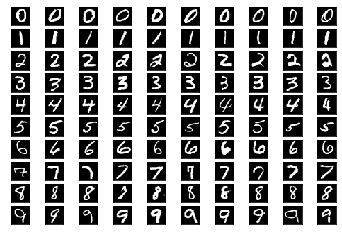

<Figure size 1440x720 with 0 Axes>

In [3]:
def P1(num_examples=10):

    # Getting the list of unique digits from the original data
    unique_digits = list(np.unique(mini_train_labels))
    
    # Setting up the plots and subplots
    f, axarr = plt.subplots(num_examples,num_examples)
    plt.figure(figsize=(20,10))
    plt.setp(axarr, xticks=(), yticks=())
    plt.style.use('grayscale')


    # Each unique digit will have its own row in our final plot grid
    for digit in unique_digits:
        indexes_of_digit = list(np.where(mini_train_labels == str(digit))[0])
        
        #Based on input size, we grab "num_examples" number of examples at random from mini_train_data
        sample_num_digit = indexes_of_digit[0:num_examples]

        #For each example we verify and process it to display as a subplot
        for i, index_of in enumerate(sample_num_digit, start=0):
            row = int(digit)
            column = i
            example = mini_train_data[index_of]
            if len(example) == 784:
                reshaped = example.reshape((28,28))
                axarr[row,column].imshow(reshaped)
            else:
                print("ERROR IN EXAMPLE {}".format(index_of))

    plt.show()

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):
    
    # We get the true labels to evaluate performance
    y_true = list(dev_labels)    

    # Run the report for each k_val
    for k_val in k_values:
        
        #Initialize and train model
        neigh = KNeighborsClassifier(n_neighbors=k_val)
        neigh.fit(mini_train_data, mini_train_labels)
        
        target_names =["Digit: 0", "Digit: 1", "Digit: 2","Digit: 3","Digit: 4",
                       "Digit: 5","Digit: 6","Digit: 7", "Digit: 8","Digit: 9",]

        #Gather predictions
        y_pred = neigh.predict(dev_data)        
        accuracy = accuracy_score(y_true, y_pred)
        #Evaluate scores
        if (k_val == 1):
            print("k={0} accuracy: {1}".format(k_val, accuracy))
            print()
            print(classification_report(y_true, y_pred,target_names=target_names))
        else:
            print("k={0}, accuracy: {1}".format(k_val, accuracy))            
            

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1 accuracy: 0.884

              precision    recall  f1-score   support

    Digit: 0       0.95      0.95      0.95       106
    Digit: 1       0.89      0.98      0.93       118
    Digit: 2       0.90      0.79      0.84       106
    Digit: 3       0.93      0.87      0.90        97
    Digit: 4       0.91      0.85      0.88        92
    Digit: 5       0.86      0.88      0.87        88
    Digit: 6       0.92      0.92      0.92       102
    Digit: 7       0.85      0.94      0.89       102
    Digit: 8       0.83      0.77      0.80        94
    Digit: 9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3, accuracy: 0.876
k=5, accuracy: 0.882
k=7, accuracy: 0.877
k=9, accuracy: 0.875


**Notes**
* Looking at the classification report for the 1-Nearest Neighbor model, its evident that Digit 8 seems to generally have the lowest scores across the metrics: {precision: 0.83, recall: 0.77, f1: 0.80} The precision here is a good measure to determine, when the costs of a false positive is high. Recall here describes when there is a high cost associated with false negatives. The F1 score tries to balance out both the precision and recall. On the basis that the digit **8** has the lowest F1 score, as well as comparing the precision and recall metrics to the other digits, I believe it is fair to claim that **8** is most difficult digit to classify with a 1-NN Model.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes. Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:

# show_output = Boolean that triggers whether we print out function logs from this question
def P3(train_sizes, show_output= True ):

    # Returns dictionary as output for each train_size 
    # {train_size: accuracy}
    accuracy_map = {}
    
    # We get the true labels to evaluate performance
    y_true = list(dev_labels)
    
    #Get the 1 - NN Model        
    neigh = KNeighborsClassifier(n_neighbors=1)

    #Run the model for each size of training data
    for size in train_sizes:

        #Print/Format time to be human readable
        if show_output: print("Report for size= {}".format(size))
        start = time.time()
        if show_output:print("Start time {}".format(datetime.datetime.fromtimestamp(start).strftime('%m/%d/%Y %H:%M:%S.%f')))


        #Train model
        neigh.fit(train_data[0:size], train_labels[0:size])
        
        target_names =["Digit: 0", "Digit: 1", "Digit: 2","Digit: 3","Digit: 4",
                       "Digit: 5","Digit: 6","Digit: 7", "Digit: 8","Digit: 9",]

        #Predict on dev_set
        y_pred = neigh.predict(dev_data)
        
        #Determine end time based on when the model is done training
        end = time.time()
        if show_output: print("End time {}".format(datetime.datetime.fromtimestamp(end).strftime('%m/%d/%Y %H:%M:%S.%f')))
        if show_output: print("Time elapsed {}".format(datetime.datetime.fromtimestamp((end-start)).strftime('%M:%S.%f')))
        
        
        #Compute the score
        acc_score = neigh.score(dev_data, dev_labels)
        
        if show_output:print("Model accuracy = {}".format(acc_score))
        print()
        
        accuracy_map[size] = acc_score
    return accuracy_map

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
p3_output = P3(train_sizes)

Report for size= 100
Start time 06/01/2020 22:40:07.267433
End time 06/01/2020 22:40:07.391804
Time elapsed 00:00.124371
Model accuracy = 0.702

Report for size= 200
Start time 06/01/2020 22:40:07.516389
End time 06/01/2020 22:40:07.743339
Time elapsed 00:00.226950
Model accuracy = 0.791

Report for size= 400
Start time 06/01/2020 22:40:07.969235
End time 06/01/2020 22:40:08.414352
Time elapsed 00:00.445117
Model accuracy = 0.811

Report for size= 800
Start time 06/01/2020 22:40:08.858123
End time 06/01/2020 22:40:09.787947
Time elapsed 00:00.929824
Model accuracy = 0.866

Report for size= 1600
Start time 06/01/2020 22:40:10.725723
End time 06/01/2020 22:40:12.604354
Time elapsed 00:01.878631
Model accuracy = 0.905

Report for size= 3200
Start time 06/01/2020 22:40:14.433023
End time 06/01/2020 22:40:18.129525
Time elapsed 00:03.696502
Model accuracy = 0.927

Report for size= 6400
Start time 06/01/2020 22:40:21.789409
End time 06/01/2020 22:40:29.285643
Time elapsed 00:07.496234
Model 

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

In [6]:
#Helper function for printing dictionaries
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key) +" : "+ str(value))
print("Problem 3 Output")
print()
pretty(p3_output)        

Problem 3 Output

100 : 0.702
200 : 0.791
400 : 0.811
800 : 0.866
1600 : 0.905
3200 : 0.927
6400 : 0.939
12800 : 0.952
25600 : 0.963


**If you want to run P4 faster!**


Please call 
* P4(use_mock = True) 

* The mock data is saved output of the actual 1-NN accuracies computed for train_sizes: [60000,120000,1000000]

################################
Part 1
Q4 ~~~ No Transformations (Original X and Y)

Predicted Accuracies for train sizes: [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.83558705 0.8362558  0.83759332 0.84026835 0.84561842 0.85631855
 0.87771881 0.92051933 1.00612037 1.23617317 1.63742805 7.52249967]

Actual Accuracies for train sizes: [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]
################################

R2 Score (Part 1): 0.4177006634161019



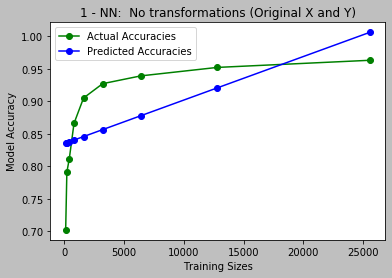

################################
Part 2
Q4 ~~~ Log Transformed X with Original Y
X: Log(Train_sizes)
Y: Y

################################

Transformed sizes, input X:
[4.605170185988092, 5.298317366548036, 5.991464547107982, 6.684611727667927, 7.3777589082278725, 8.070906088787819, 8.764053269347762, 9.457200449907708, 10.150347630467653, 11.002099841204238, 11.695247021764184, 13.815510557964274]


Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963, 0.971, 0.971, 0.971]

Predicted Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.7499555555555555, 0.7806888888888888, 0.8114222222222222, 0.8421555555555555, 0.8728888888888888, 0.9036222222222222, 0.9343555555555555, 0.9650888888888889, 0.9958222222222222, 1.0335879166434623, 1.0643212499767958, 1.1583312493537086]


R2 Score (Part 2):  0.9068304252436642



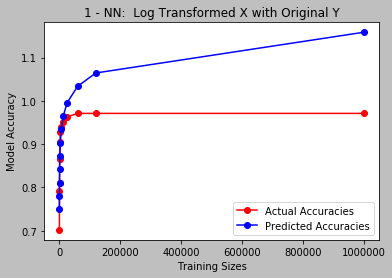

################################
Part 3
Q4 ~~~ Original X and Logit Transformed Y
X: Train_sizes
Y: (Y/(1-Y)) = Logit(Y)

################################

Transformed Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.8568399175204064, 1.3309637158028431, 1.456521039055771, 1.8660451086115237, 2.2540580520993854, 2.541494124417465, 2.7339416150349507, 2.9873640238834733, 3.2591354991539, 3.5110306383048497, 3.5110306383048497, 3.5110306383048497]

Transformed Predicted Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[ 1.72405502  1.73156472  1.74658411  1.7766229   1.83670047  1.95685563
  2.19716593  2.67778655  3.63902777  6.22236357 10.72818181 76.8135161 ]


Below is after transforming, and then inverting the transform to bring us back into the space of sizes and accuracies

Un-transformed Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 10000

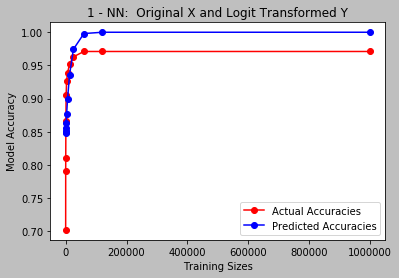

################################
Part 4
Q4 ~~~ Log Transformed X and Logit Transformed Y
X: Log(Train_sizes)
Y: Log(Y/(1-Y)) = Logit(Y)

################################

Transformed sizes, input X:
[4.605170185988092, 5.298317366548036, 5.991464547107982, 6.684611727667927, 7.3777589082278725, 8.070906088787819, 8.764053269347762, 9.457200449907708, 10.150347630467653, 11.002099841204238, 11.695247021764184, 13.815510557964274]


Transformed Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.8568399175204064, 1.3309637158028431, 1.456521039055771, 1.8660451086115237, 2.2540580520993854, 2.541494124417465, 2.7339416150349507, 2.9873640238834733, 3.2591354991539, 3.5110306383048497, 3.5110306383048497, 3.5110306383048497]

Transformed Predicted Accuracies for sizes=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
[0.95568434 1.25249556 1.54930679 1.84611801 2.14292923 2.43974046
 2.73655168 3.0333629  3.330174

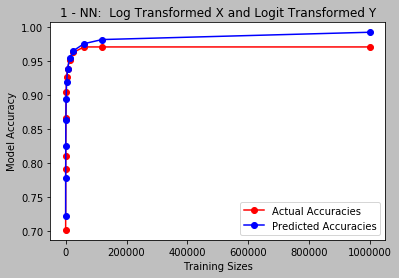

In [7]:
#Please refer to the output for a clear breakdown of intermediate steps and values!
def P4(use_mock = False):
    
    #Non-transformed model
    def part1():
        #######################################
        # Part 1
        print("################################")
        print("Part 1")
        print("Q4 ~~~ No Transformations (Original X and Y)")
        print()
        #######################################
        
        #Get accuracies for 1-NN Model data from Problem 3, maintain order
        train_sizes = list(p3_output.keys())
        actual_accuracies = [p3_output[t_size] for t_size in train_sizes]

        #Setup data and train LinearRegression Model
        X = [[val] for val in train_sizes]
        lm = LinearRegression().fit(X, actual_accuracies)
        
        all_x = [[val] for val in train_sizes + extreme_sizes]
        
        print("Predicted Accuracies for train sizes: {}".format(train_sizes + extreme_sizes))
        p3_predictions = lm.predict(all_x)
        
        print(p3_predictions)
        print()
        print("Actual Accuracies for train sizes: {}".format(train_sizes))
        print(actual_accuracies)
        print("################################")
        print()
        print("R2 Score (Part 1):", lm.score(X, actual_accuracies))
        print()
        
        # plotting the line 1 points 
        plt.plot(train_sizes, actual_accuracies, 'go', label = "Actual Accuracies", color="green", linestyle="-")

        # plotting the line 2 points 
        plt.plot(train_sizes, p3_predictions[0:9], 'bo', label = "Predicted Accuracies",color="blue", linestyle="-")
        plt.xlabel('Training Sizes')

        # Set the y axis label of the current axis.
        plt.ylabel('Model Accuracy')
        # Set a title of the current axes.

        plt.title('1 - NN:  No transformations (Original X and Y)')
        # show a legend on the plot
        plt.legend()
        # Display a figure.
        plt.show()
        return p3_predictions
        
    def part2():
         
        #Get train data from Problem 3, and transform the accuracies, maintain order
        train_sizes = list(p3_output.keys())
        non_transformed_labels = [p3_output[t_size] for t_size in train_sizes]

        #Train the new LinearRegression Model with the transformed train_sizes
        X = [[np.log(val)] for val in train_sizes]
        transformed_x_lm = LinearRegression().fit(X, non_transformed_labels)
        
        
        #######################################
        # Part 2
        print("################################")
        print("Part 2")
        print("Q4 ~~~ Log Transformed X with Original Y")
        print("X: Log(Train_sizes)")
        print("Y: Y")
        print()
        #######################################

        part2_train_sizes = [60000, 120000, 1000000]
        print("################################")
        print()
        
        combo_part2_sizes = train_sizes + part2_train_sizes
        part2_non_transformed_accuracies = [extreme_output[t_size] for t_size in part2_train_sizes]
        part2_input = [[np.log(val)] for val in combo_part2_sizes]
        combo_part2_acc = list(non_transformed_labels) + list(part2_non_transformed_accuracies )

        print("Transformed sizes, input X:")
        print([np.log(val) for val in combo_part2_sizes])
        print()
        print()
        
        
        print("Accuracies for sizes={}".format(combo_part2_sizes))
        print(combo_part2_acc)
        print()

        
        print("Predicted Accuracies for sizes={}".format(combo_part2_sizes))
        part2_predictions = transformed_x_lm.predict(part2_input)
        print(list(part2_predictions))
        print()
        print()
        
        print("R2 Score (Part 2): ", r2_score(non_transformed_labels, part2_predictions[0:9]))
        print()
        
        # plotting the line 1 points
        plt.plot(combo_part2_sizes, combo_part2_acc, 'ro', label = "Actual Accuracies", color="red", linestyle="-")

        # plotting the line 2 points 
        plt.plot(combo_part2_sizes, part2_predictions, 'bo', label = "Predicted Accuracies",color="blue", linestyle="-")
        plt.xlabel('Training Sizes')

        # Set the y axis label of the current axis.
        plt.ylabel('Model Accuracy')

        
        # Set a title of the current axes.
        plt.title('1 - NN:  Log Transformed X with Original Y')

        # show a legend on the plot
        plt.legend()
        # Display a figure.
        plt.show()
        
        return part2_predictions
        
        
    #Improved model with original X, and Logit on Y
    def part3():
        
        #Logit Transformation
        def logit(x):
            x = np.asarray(x)
            return np.log(x/(1-x)) 

        #Inverse logit transformation so that we can still get back our prediction accuracies
        def inv_logit(x):
            x = np.asarray(x)
            return np.exp(x)/(np.exp(x)+1)

        #Get train data from Problem 3, and transform the accuracies, maintain order
        train_sizes = list(p3_output.keys())
        transformed_labels = logit([p3_output[t_size] for t_size in train_sizes])

        #Train the new LinearRegression Model with the transformed accuracies
        X = [[val] for val in train_sizes]
        transformed_y_lm = LinearRegression().fit(X, transformed_labels)
        
        
        #######################################
        # Part 3
        print("################################")
        print("Part 3")
        print("Q4 ~~~ Original X and Logit Transformed Y")
        print("X: Train_sizes")
        print("Y: (Y/(1-Y)) = Logit(Y)")
        print()
        #######################################
        print("################################")
        print()
        
        combo_part3_sizes = train_sizes + extreme_sizes
        transformed_extreme_accuracies = logit([extreme_output[t_size] for t_size in extreme_sizes])
        part3_input = [[val] for val in combo_part3_sizes]
        combo_part3_acc = list(transformed_labels) + list(transformed_extreme_accuracies)
        

        print("Transformed Accuracies for sizes={}".format(combo_part3_sizes))
        print(combo_part3_acc)
        print()

        
        print("Transformed Predicted Accuracies for sizes={}".format(combo_part3_sizes))
        part3_predictions = transformed_y_lm.predict(part3_input)
        print(part3_predictions)
        print()
        print()

        all_accuracies = [p3_output[t_size] for t_size in train_sizes] + [extreme_output[t_size] for t_size in extreme_sizes]        
        
        print("Below is after transforming, and then inverting the transform to bring us back into the space of sizes and accuracies")
        print()
        print("Un-transformed Accuracies for sizes={}".format(combo_part3_sizes))
        print(all_accuracies)
        print()
        
        print("Un-transformed Prediction Accuracies for sizes={}".format(combo_part3_sizes))
        print(inv_logit(part3_predictions))
        print()
        
        print()
        print("R2 Score (Part 3): ", r2_score(all_accuracies[0:9],
                                              inv_logit(part3_predictions)[0:9]))
        print()
        
        # plotting the line 1 points
        plt.plot(combo_part3_sizes, inv_logit(combo_part3_acc), 'ro', label = "Actual Accuracies", color="red", linestyle="-")

        # plotting the line 2 points 
        plt.plot(combo_part3_sizes, inv_logit(part3_predictions), 'bo', label = "Predicted Accuracies",color="blue", linestyle="-")
        plt.xlabel('Training Sizes')

        # Set the y axis label of the current axis.
        plt.ylabel('Model Accuracy')
        
        # Set a title of the current axes.
        plt.title('1 - NN:  Original X and Logit Transformed Y')
        # show a legend on the plot
        plt.legend()
        # Display a figure.
        plt.show()   
        
        return inv_logit(part3_predictions)
        
        
        
    #Improved model with log transformation
    def part4():
        
        #Logit Transformation
        def logit(x):
            x = np.asarray(x)
            return np.log(x/(1-x)) 

        #Inverse logit transformation so that we can still get back our prediction accuracies
        def inv_logit(x):
            x = np.asarray(x)
            return np.exp(x)/(np.exp(x)+1)

        #Get train data from Problem 3, and transform the accuracies, maintain order
        train_sizes = list(p3_output.keys())
        transformed_labels = logit([p3_output[t_size] for t_size in train_sizes])

        #Train the new LinearRegression Model with the transformed accuracies and transformed train_sizes
        X = [[np.log(val)] for val in train_sizes]
        transformed_lm = LinearRegression().fit(X, transformed_labels)
        
        
        #######################################
        # Part 4
        print("################################")
        print("Part 4")        
        print("Q4 ~~~ Log Transformed X and Logit Transformed Y")
        print("X: Log(Train_sizes)")
        print("Y: Log(Y/(1-Y)) = Logit(Y)")        
        print()
        #######################################
        print("################################")
        print()
        
        combo_part4_sizes = train_sizes + extreme_sizes
        transformed_extreme_accuracies = logit([extreme_output[t_size] for t_size in extreme_sizes])
        part4_input = [[np.log(val)] for val in combo_part4_sizes]
        combo_part4_acc = list(transformed_labels) + list(transformed_extreme_accuracies)
        

        print("Transformed sizes, input X:")
        print([np.log(val) for val in combo_part4_sizes])
        print()
        print()
        
        
        print("Transformed Accuracies for sizes={}".format(combo_part4_sizes))
        print(combo_part4_acc)
        print()

        
        print("Transformed Predicted Accuracies for sizes={}".format(combo_part4_sizes))
        part4_predictions = transformed_lm.predict(part4_input)
        print(part4_predictions)
        print()
        print()
        
        
        print("Below is after transforming, and then inverting the transform to bring us back into the space of sizes and accuracies")
        print()
        print("Un-transformed Accuracies for sizes={}".format(combo_part4_sizes))
        print([p3_output[t_size] for t_size in train_sizes] + [extreme_output[t_size] for t_size in extreme_sizes])
        print()
        
        print("Inverted Prediction Accuracies for sizes={}".format(combo_part4_sizes))
        print(inv_logit(part4_predictions))
        print()
    

        print()
        print("R2 Score (Part 4): ", r2_score([p3_output[t_size] for t_size in train_sizes], inv_logit(part4_predictions[0:9])))        
        print()
        
        ################################################################################################################
        
        # plotting the line 1 points
        plt.plot(combo_part4_sizes, inv_logit(combo_part4_acc), 'ro', label = "Actual Accuracies", color="red", linestyle="-")

        # plotting the line 2 points 
        plt.plot(combo_part4_sizes, inv_logit(part4_predictions), 'bo', label = "Predicted Accuracies",color="blue", linestyle="-")
        plt.xlabel('Training Sizes')

        # Set the y axis label of the current axis.
        plt.ylabel('Model Accuracy')
                
        
        # Set a title of the current axes.
        plt.title('1 - NN:  Log Transformed X and Logit Transformed Y')
        # show a legend on the plot
        plt.legend()
        # Display a figure.
        plt.show()

        return inv_logit(part4_predictions)


    #Has the 1-NN computed accuracies for [60000,120000,1000000]
    extreme_sizes = [60000, 120000, 1000000]
    if use_mock:
        #This mock output is identical to actual output, it saves time in terms of running the model
        mock_extreme = {60000 : .971, 120000 : .971, 1000000 : .971}
        extreme_output  = mock_extreme
    else:
        extreme_output  = P3(extreme_sizes)        
    
    part1 = part1()
    part2 = part2()
    part3 = part3()
    part4 = part4()
    
    
    columns = ["train_size", "original_accuracies", "x_y", "logx_y","x_logit_y","logx_logit_y"]
    acc_table = pd.DataFrame(columns=columns)
    acc_table["train_size"] = list(p3_output.keys()) + extreme_sizes
    acc_table["original_accuracies"] = list(p3_output.values()) + [.971,.971,.971]
    acc_table["x_y"] = list(part1)
    acc_table["logx_y"] = list(part2)
    acc_table["x_logit_y"] = list(part3)
    acc_table["logx_logit_y"] = list(part4)
    
    return acc_table
    

acc_table = P4(use_mock=True)

In [8]:
acc_table

,train_size,original_accuracies,x_y,logx_y,x_logit_y,logx_logit_y
0,100,0.702,0.835587,0.749956,0.848650,0.722257
1,200,0.791,0.836256,0.780689,0.849612,0.777732
2,400,0.811,0.837593,0.811422,0.851521,0.824814
3,800,0.866,0.840268,0.842156,0.855279,0.863671
4,1600,0.905,0.845618,0.872889,0.862558,0.895006
5,3200,0.927,0.856319,0.903622,0.876192,0.919808
6,6400,0.939,0.877719,0.934356,0.899995,0.939149
7,12800,0.952,0.920519,0.965089,0.935703,0.954059
8,25600,0.963,1.006120,0.995822,0.974395,0.965450
9,60000,0.971,1.236173,1.033588,0.998019,0.975753


In [9]:
index = ["x_y", "logx_y","x_logit_y","logx_logit_y"]
r2_table = pd.DataFrame(index=index, columns=["R2_Score"])

p1 = r2_score(acc_table["original_accuracies"][0:9],acc_table["x_y"][0:9])
p2 = r2_score(acc_table["original_accuracies"][0:9],acc_table["logx_y"][0:9])
p3 = r2_score(acc_table["original_accuracies"][0:9],acc_table["x_logit_y"][0:9])
p4 = r2_score(acc_table["original_accuracies"][0:9],acc_table["logx_logit_y"][0:9])

r2_table["R2_Score"] = [p1,p2,p3,p4]
r2_table

,R2_Score
x_y,0.417701
logx_y,0.906830
x_logit_y,0.471984
logx_logit_y,0.984887


**Notes:**


* The problem here with linear regression is that it doesn't really account for the fact that the predicted Y values should be in the range of [0 - 1.0], as they are accuracies. The first plot with no transformations clearly shows that the actual accuracies are non-linearly related to training set sample sizes. However with the Linear Regresser we try to fit a line and can see that with larger values of X such as 25600, 60000,120000, and 1000000, based on the positive linear relationship the predicted Y will increase and predict accuracies that are greater than 1.0.


* With the motivation to prevent this we take transformations of both the input X and output Y when constructing our model. This way we are able to maintain that the dependent variable (accuracy) falls within the [0-1.0] range. The intuition behind using the logit transformation is to pull out the ends of the distribution. Over a wide range of  values, logit(x) works well to limit our upper bound. After various iterations to the transformations, our final model has the log(X) as the input and log(odds(Y)) as the dependent variable.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion Matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

Misclassified Cases
(Actual, Predicted): [Indexes of this case]

(9, 4) : [1, 395, 524]
(7, 2) : [7]
(8, 1) : [8, 56, 160, 544, 674]
(4, 9) : [25, 164, 318, 337, 653, 768, 777, 834, 858, 922, 966]
(2, 8) : [33, 81, 150, 510, 732, 881]
(4, 7) : [46, 992]
(6, 8) : [59]
(8, 3) : [69, 205, 475]
(9, 5) : [70, 290]
(0, 8) : [93, 941]
(3, 7) : [95, 173]
(8, 5) : [112, 118, 631]
(0, 7) : [117]
(0, 6) : [123]
(6, 5) : [131, 861]
(2, 4) : [140, 866]
(5, 6) : [141, 151, 240, 390, 994]
(5, 8) : [161, 272]
(8, 9) : [188, 264, 545, 764]
(3, 8) : [196, 293, 9

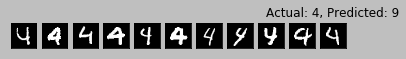

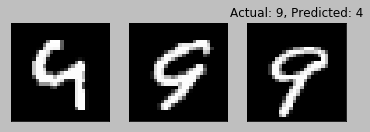

In [10]:
def P5():

    #Helper method to easily identify the misclassified pairs and their counts
    def misclassified_pairs(y_test, y_pred):

        y_test = np.asarray(y_test)
        y_pred = np.asarray(y_pred)
        misclassified = np.where(y_test != y_pred)[0]

        pairs = {}
        indexes_so_far = []
        for index in misclassified:
            pair_key = "({0}, {1})".format(y_test[index], y_pred[index])

            if pair_key in pairs:
                indexes_so_far = pairs[pair_key]
                indexes_so_far.append(index)
                pairs[pair_key] = indexes_so_far

            else:
                pairs[pair_key] = [index]

        print("Misclassified Cases")
        print("(Actual, Predicted): [Indexes of this case]")
        print()
        pretty(pairs, 0)
        return pairs

    
    #Fitting and predicting using a 1-NN model
    y_true = list(dev_labels)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data, mini_train_labels)
    y_pred = neigh.predict(dev_data)
    
    
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()
    
    mis_pairs = misclassified_pairs(y_true, y_pred)
    
    # From the output we can see that the pair most misclassified was {y_true:4, y_pred:9}
    max_missed_indexes = mis_pairs["(4, 9)"]

    #Draw the images of the cases that were misclassified
    figure, axarr = plt.subplots(1, len(max_missed_indexes))
    plt.setp(axarr, xticks=(), yticks=())
    plt.title("Actual: 4, Predicted: 9")
    for i in range(len(max_missed_indexes)):
        index = max_missed_indexes[i]
        axarr[i].imshow(dev_data[index].reshape((28,28)))
        
        
    #Also printing the flipped scenario to see the similarity of the digits {y_true:9, y_pred:4} 
    max_missed_indexes = mis_pairs["(9, 4)"]

    #Draw the images of the cases that were misclassified
    figure, axarr = plt.subplots(1, len(max_missed_indexes))
    plt.setp(axarr, xticks=(), yticks=())
    plt.title("Actual: 9, Predicted: 4")
    for i in range(len(max_missed_indexes)):
        index = max_missed_indexes[i]
        axarr[i].imshow(dev_data[index].reshape((28,28)))
        
P5()

**Notes:**

* After studying the output for the misclassified pairs we see that the case with the highest misclassifications is the pair (4,9). The actual digit is 4, but has been predicted as a 9. We can see above all the images that show these wrong predictions.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implemented below is a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data


Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

################ Blur the Data ################
Blurring Mini Train Set
Start time 06/01/2020 22:42:08.159861
End time 06/01/2020 22:42:14.123805
Blurring time 00:05.963944


Blurring Dev Set
Start time 06/01/2020 22:42:14.123957
End time 06/01/2020 22:42:20.056682
Blurring time 00:05.932725


################ Fit and Evaluate Models ################
No Blurring:
0.884

Blurred Training Data:
0.907

Blurred dev data:
0.868

Blurred training data and dev data
0.905

###################################

Blurring Example:



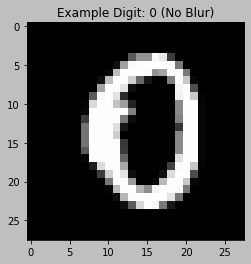

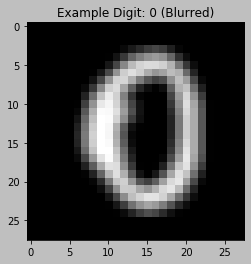

In [11]:
def checkValidPixel(column_row_pair):
    x = column_row_pair[0]
    y = column_row_pair[1]
    return (x >= 0) and (x <= 27) and (y >= 0) and (y <= 27)

def weighted_average(weights):
    nonzero_weights = [val if val >= 0 else 0 for val in weights ]
    return sum(nonzero_weights)/len(nonzero_weights)

def gaus_blur(image_vector, return_as_vector=True):

    image = image_vector.reshape((28,28))
    image_copy = image.copy()

    for row in range(len(image)):
        for column in range(len(image)):

            left= (column - 1, row)
            right= (column + 1, row)
            up= (column, row - 1)
            down= (column, row + 1)
            dl= (column - 1, row + 1)
            ul= (column - 1, row - 1)
            dr= (column + 1, row + 1)
            ur= (column + 1, row - 1)
            current = (column, row)

            neighbors = [left,right,up,down,dl,ul,dr,ur, current]

            #Here settign an extreme dummy value for the sake of not filtering valid "0.0" vals
            weights = [image[neighbor] if checkValidPixel(neighbor) else -99999 for neighbor in neighbors]

            weighted_pixel_val = weighted_average(weights)
            image_copy[(column,row)] = weighted_pixel_val

    if (return_as_vector):
        return image_copy.ravel()
    else:
        return image_copy

def P6():
    ################ Blur the Data ################
    print('################ Blur the Data ################')

    #Blured Mini Train Data
    start = time.time()
    print("Blurring Mini Train Set")
    print("Start time {}".format(datetime.datetime.fromtimestamp(start).strftime('%m/%d/%Y %H:%M:%S.%f')))
    blurred_mini_train_data = [gaus_blur(img_vector) for img_vector in mini_train_data]
    end = time.time()
    print("End time {}".format(datetime.datetime.fromtimestamp(end).strftime('%m/%d/%Y %H:%M:%S.%f')))
    print("Blurring time {}".format(datetime.datetime.fromtimestamp((end-start)).strftime('%M:%S.%f')))
    print()
    print()

#     #Blured Train Data (THIS TAKES 5 MINUTES TO BLUR!!)
#     start = time.time()
#     print("Start time {}".format(datetime.datetime.fromtimestamp(start).strftime('%m/%d/%Y %H:%M:%S.%f')))
#     blurred_train_data = [gaus_blur(img_vector) for img_vector in train_data]
#     end = time.time()
#     print("End time {}".format(datetime.datetime.fromtimestamp(end).strftime('%m/%d/%Y %H:%M:%S.%f')))
#     print("Blurring time {}".format(datetime.datetime.fromtimestamp((end-start)).strftime('%M:%S.%f')))
#     print()
#     print()

    #Blured Dev Data
    start = time.time()
    print("Blurring Dev Set")
    print("Start time {}".format(datetime.datetime.fromtimestamp(start).strftime('%m/%d/%Y %H:%M:%S.%f')))
    blurred_dev_data = [gaus_blur(img_vector) for img_vector in dev_data]
    end = time.time()
    print("End time {}".format(datetime.datetime.fromtimestamp(end).strftime('%m/%d/%Y %H:%M:%S.%f')))
    print("Blurring time {}".format(datetime.datetime.fromtimestamp((end-start)).strftime('%M:%S.%f')))
    print()
    print()

    ################ Fit and Evaluate Models ################
    print('################ Fit and Evaluate Models ################')

    
    # No blurring
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data, mini_train_labels)
    pred_labels = neigh.predict(dev_data)
    print('No Blurring:')
    print(accuracy_score(dev_labels, pred_labels))
    print()    
    
    

    # Blurred training set, not blurred dev set
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(blurred_mini_train_data, mini_train_labels)
    pred_labels = neigh.predict(dev_data)
    print('Blurred Training Data:')
    print(accuracy_score(dev_labels, pred_labels))
    print()

    # Not blurred training set, blurred dev set
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data,mini_train_labels)
    pred_labels = neigh.predict(blurred_dev_data)
    print('Blurred dev data:')
    print(accuracy_score(dev_labels, pred_labels))
    print()

    # Blurred trains set and dev set
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(blurred_mini_train_data,mini_train_labels)
    pred_labels = neigh.predict(blurred_dev_data)
    print('Blurred training data and dev data')  
    print(accuracy_score(dev_labels, pred_labels))

    print()
    print("###################################")
    print()
    print("Blurring Example:")
    print()
    
    # Verify Blurring works for a sample image
    for slot, image_vector in enumerate(mini_train_data, start = 1):
        # The first column is the label
        image_blur = gaus_blur(image_vector, return_as_vector=False)
        image = mini_train_data[0].reshape((28,28))

        # Plot
        plt.title("Example Digit: 0 (No Blur)")
        plt.imshow(image, cmap='gray')
        plt.show()
        plt.title("Example Digit: 0 (Blurred)")
        plt.imshow(image_blur, cmap='gray')
        plt.show()

        break    

P6()

### Part 7: 

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

**Begin by plotting a graph to get a better sense of where we can set our binary thresholds**


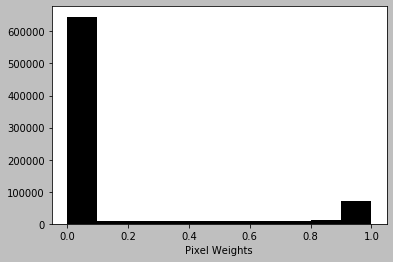

In [12]:
plt.xlabel('Pixel Weights')
plt.hist(mini_train_data.ravel())
plt.show()

In [13]:

non_zero = np.count_nonzero(mini_train_data.ravel())
zero = len(mini_train_data.ravel()) - np.count_nonzero(mini_train_data.ravel())
total = len(mini_train_data.ravel())


print("Percentage (weight = 0.0): {}%".format(round(zero*100/total, 3)))
print("Percentage (weight != 0.0): {}%".format(round(non_zero*100/total, 3)))

Percentage (weight = 0.0): 80.66%
Percentage (weight != 0.0): 19.34%


<em>**Model 1: BernoulliNB**</em>

Looking at the histograms above and the spread of pixel weights, its fair to say that if a weight is 0.0 then it has no color, it is a black pixel. Pixel weight greater than 0.0 will be treated as a pixel with color. Therefore we will just use 0.0 as our binarize value to distinguish these two categories.

**Next plot a graph to get a better sense of where we can set our multi-category thresholds**


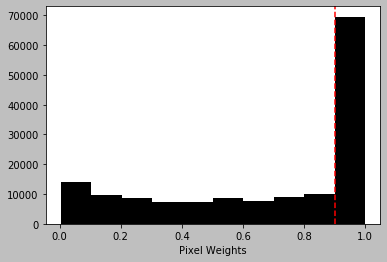

In [14]:
plt.xlabel('Pixel Weights')
plt.hist([val for val in mini_train_data.ravel() if val > 0])
plt.axvline(x=0.9, linestyle="--", color="red")
plt.show()

<em>**Model 2: MultinomialNB**</em>

Looking at the histograms above, first note that we are ignoring the "0.0" to get a clearer picture of the remaining data. It is clear that weight = 0.0 indicates no color, studying the diagream we can see a distinct spike after weight=0.9. This shows us that weight > 0.9 indicates a black pixel. Therefore weights that fall in the following bucket: [0 < weight < 0.9] can be categorized as gray.

In [15]:
#We learn from above that "0" represents a black pixel and "1" represents a white pixel

def P7():

    def binaryModel():
        # Threshold at 0.0 
        # If the pixel weight > 0: White
        # If the pixel weight == 0: Black
        nb_model_1 = BernoulliNB(binarize=0.1)
        nb_model_1.fit(mini_train_data, mini_train_labels)        
        print("Bernoulli NB SCORE {}".format(nb_model_1.score(dev_data, dev_labels)))
    
    def multinomialModel():
        
        #Bins determined from analysis above, categorize our pixels {0: black, 1: gray, 2: white}
        bins = np.array([0.0, 0.1, 0.9])
        X = [np.digitize(image, bins) - 1 for image in mini_train_data]        
        
        nb_model_2 = MultinomialNB()
        nb_model_2.fit(X, mini_train_labels)

        #Takes our bins, and categorizes the pixel. (black, gray, white)
        dev_cat_X = [np.digitize(image, bins) - 1 for image in dev_data]
        pred_labels = nb_model_2.predict(dev_cat_X)

        print("Multinomial NB SCORE {}".format(nb_model_2.score(dev_cat_X, dev_labels)))

    binaryModel()
    multinomialModel()

P7()

Bernoulli NB SCORE 0.814
Multinomial NB SCORE 0.807


**Notes:**

The multinomial classifier actually does not improve the overall model's accuracy as we see a drop when comparing it to the binomial classifier. Looking at the histograms above, we notice that the distribution is very bimodal, nearly 80% of the pixel weights are 0.0 (empty black space) and the remaining 20%, when color is detected, majority fall with in the weight bin > 0.9 (i.e ~ weight = 1.0). Therefore being classified as a pixel that is part of the digit (white space)

If we think about the real life scenario here, when the digit was writen, most likely the individual writing would have been using a single colored pen or pencil. The data was not meant to express multiple colors, rather if a weaker "middle" weight was recorded, this would be due to the sheer variance in how individuals write. Given that this is not something we are trying to capture, the multinomial classifier is not the right choice. In addition the posterior probabilities for a multinmial would be lesser across the board, as we are dividing up our probability space into more subspaces. In our case we mainly only care for black or white, but by introducing gray, we then diminish the value of the posteriors that could have been black or white, hence causing a negative impact on our accuracy. Overall given that the distribution is bimodal, and the accuracy is greater, the Bernoulli Naive Bayes Model is more appropriate to represent this data.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

Mean Alpha Test Scores
1e-10 : 0.813
0.0001 : 0.821
0.001 : 0.825
0.01 : 0.82
0.1 : 0.818
0.5 : 0.816
1.0 : 0.811
2.0 : 0.805
10.0 : 0.781


Best alpha =  {'alpha': 0.001}


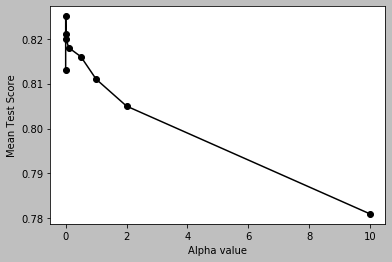

In [16]:
def P8(alphas):

    bern = BernoulliNB(binarize=0) 
    bern_cv = GridSearchCV(bern,alphas, cv=5, iid=True, return_train_score=True)
    output = bern_cv.fit(mini_train_data, mini_train_labels)

    alphas = list(bern_cv.cv_results_["param_alpha"])
    scores = list(bern_cv.cv_results_["mean_test_score"])
    
    
    print("Mean Alpha Test Scores")
    pretty(dict(zip(alphas,scores)))
    print()
    
    plt.plot(alphas,scores,'-o')
    plt.xlabel('Alpha value')
    plt.ylabel("Mean Test Score")
    plt.show

    return output

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

**Notes:**

From our results we see that the best alhpa value is, **$\alpha$ = 0.001**. We see that when alpha is, **0 < alpha <= 1** that the smoothd score is marginally better than the bare bones Bernoulli NB. I was not expecting the score to be better with such a small alpha value as the distinction between classificatios is much more stark. 

The motivation behind LaPlace smoothing is mainly to solve the problem of zero probability and in addition generalize the model by a certain factor. Lower alpha here means you are more overconfident, i.e. if posteriors of features for class A that had more 0s than that of class B, when we adding in the low alpha (i.e. 0.001), and then eventually take the product of all the posteriors for each class, class A will decrease significantly in comparison to class B hence creating a stark difference in the predicted class.

By generalizing the model a bit in this case I would expect that the accuracy score would increase. Surprisingly the "sweet spot" here is a very small alpha, anything greater than 1 makes the score worse! 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.87      0.81      0.84       118
           2       0.59      0.44      0.51       106
           3       0.64      0.29      0.40        97
           4       0.78      0.32      0.45        92
           5       0.30      0.67      0.41        88
           6       0.74      0.85      0.79       102
           7       0.92      0.57      0.70       102
           8       0.38      0.11      0.17        94
           9       0.43      0.91      0.58        95

    accuracy                           0.59      1000
   macro avg       0.64      0.58      0.57      1000
weighted avg       0.65      0.59      0.58      1000

theta: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


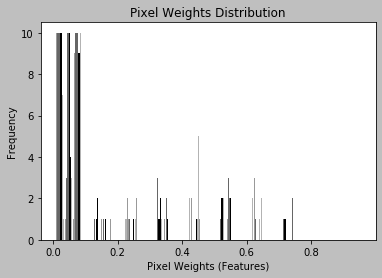


#1 GausNB No Adjustments: 0.593
#2 GausNB Sigma=1 Score: 0.593
#3 GausNB Random Normal Noise Score: 0.819
#4 GausNB Blurred Train Data Score: 0.635
#5 GausNB Noisy Blurred Train Data Score: 0.841
#6 Smoothed GausNB Blurred - Train Data Score: 0.842
#7: Bernoulli NB Score (P7): 0.809


In [17]:
def P9():

    ########### Model #1 ###########
    gnb_1 = GaussianNB()
    gnb_1.fit(mini_train_data, mini_train_labels)
    
    
    pred_labels = gnb_1.predict(dev_data)
    print(classification_report(dev_labels, pred_labels))
    print('theta: {0}'.format(gnb_1.theta_))
            
    plt.hist(gnb_1.theta_)
    plt.xlabel("Pixel Weights (Features)")
    plt.ylabel("Frequency")
    plt.title("Pixel Weights Distribution")
    plt.show()
    
    print()
    score_1 = gnb_1.score(dev_data,dev_labels)
    print("#1 GausNB No Adjustments: {}".format(score_1))

    ########### Model #2 ###########
    gnb_2 = GaussianNB()
    gnb_2.sigma_ = 1
    gnb_2.fit(mini_train_data, mini_train_labels)
    score_2 = gnb_2.score(dev_data,dev_labels)
    print("#2 GausNB Sigma=1 Score: {}".format(score_2))
    
    
    ########### Model #3 ###########
    gnb_3 = GaussianNB()
    
    noise = []
    for i in range(len(mini_train_data)):
        noise.append(np.random.normal(0,0.1,28*28))
    noisy_mini_train_data= np.array(mini_train_data)+np.array(noise)
    gnb_3.fit(noisy_mini_train_data, mini_train_labels)
    
    score_3 = gnb_3.score(dev_data,dev_labels)
    print("#3 GausNB Random Normal Noise Score: {}".format(score_3))
    
    
    ########### Model #4 ###########
    gnb_4 = GaussianNB()
    blurred_mini_train_data = [gaus_blur(img_vector) for img_vector in mini_train_data]
    gnb_4.fit(blurred_mini_train_data, mini_train_labels)
    
    score_4 = gnb_4.score(dev_data,dev_labels)
    print("#4 GausNB Blurred Train Data Score: {}".format(score_4))
    
    
    ########### Model #5 ###########
    gnb_5 = GaussianNB()
    blurred_mini_train_data = np.array([gaus_blur(img_vector) for img_vector in mini_train_data])
    
    noise = []
    for i in range(len(blurred_mini_train_data)):
        noise.append(np.random.normal(0,0.1,28*28))
    noisy_blurred_data= blurred_mini_train_data+np.array(noise)
    gnb_5.fit(noisy_blurred_data, mini_train_labels)
    
    score_5 = gnb_5.score(dev_data,dev_labels)
    print("#5 GausNB Noisy Blurred Train Data Score: {}".format(score_5))
    
    
    ########### Model #5 ###########
    gnb_6 = GaussianNB(var_smoothing=.1)
    blurred_mini_train_data = np.array([gaus_blur(img_vector) for img_vector in mini_train_data])
    gnb_6.fit(blurred_mini_train_data, mini_train_labels)
    score_6 = gnb_6.score(dev_data,dev_labels)
    print("#6 Smoothed GausNB Blurred - Train Data Score: {}".format(score_6))    
    
    
    print("#7: Bernoulli NB Score (P7): 0.809")

P9()

**Notes:**

We learn that `theta_` is an array of the means of each feature per class, as we can see in the histogram above nearly 80% of the pixel weights are 0.0, which are the black pixels (empty no-color spaces). The Gaussian NB model assumes normally distributed features, which is clearly not the case here. 

Steps taken:

**1.**  GausNB No Adjustments

**2.**  Some of the features have a std deviation of zero, which does not mesh well with the normal distribution assumption of the Gaussian NBs; therefore another adjustment here is fixing $\sigma = 1$. However this didn't cause any change in the score

**3.**  This adjustment generates noise by randomly picking from the normal distribution and modifiying our training_data. Givent Gaussian NB is assuming normal behavior, this adjustnemnt showed good improvement!

**4.**  To increase variance in features of the data, and generalize our output I applied a Gaussian Blur to the training data. This should some improvement.

**5.**  Figured with the reasoning mentioned in #3 and #4, it is fair to take the two working adjustments and try both together.

**6.** Realized there was a <em>var_smoothing</em> param to GaussiaNB which takes a portion of the largest variance of all features, and adds it to the variances for calculation stability. Using the blurred_mini_train_data, this results in the highest accuracy!

Ultimately, with **#6** we increased the base Gaussian NB model's accuracy and brought it much closer, and in fact to excede the barebones Bernoulli NB model.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

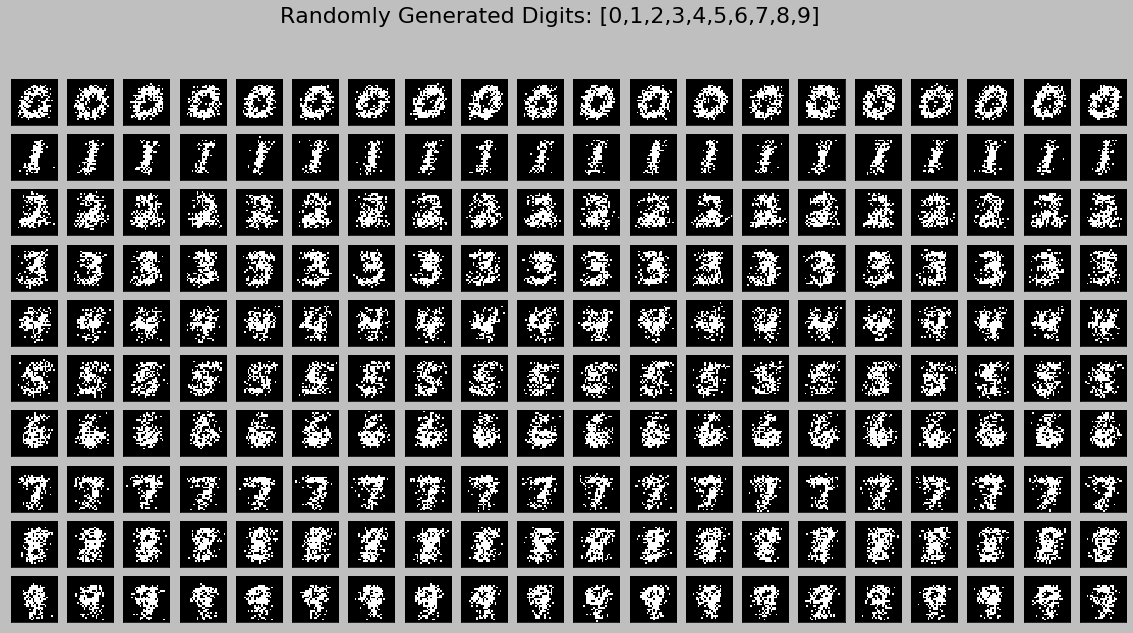

In [18]:
def P10(num_examples):

### STUDENT START ###

    unique_digits = [0,1,2,3,4,5,6,7,8,9]

    bern = BernoulliNB(alpha=0.001, binarize=0, fit_prior=False)
    bern.fit(train_data , train_labels)
    
    
    # Plotting setup
    fig, axarr = plt.subplots(len(unique_digits), num_examples, figsize=(20,10))
    plt.setp(axarr, xticks=(), yticks=())
    plt.style.use('grayscale')
    
    
    for number in unique_digits:
        for col in range(num_examples):
            
            # np.random.rand will generate a value [0,1)
            # Use the modal's probabilities to generate if pixel is "on" or "off"
            image = (np.random.rand(784) < np.exp(bern.feature_log_prob_[number])).reshape(28,28)
            axarr[number,col].imshow(image)

    # Minor figure adjustments
    fig.suptitle('Randomly Generated Digits: [0,1,2,3,4,5,6,7,8,9]', size=22)



### STUDENT END ###

P10(20)

**Notes:**

Comparing the output above to the output of Question #1 we can see that the original training data digits are visibly much smoother. The generated digits shown above are inherently nosier because each pixel that is generated through approximations that are a result of comparisons from the uniform distribution to the probabilities of the Bernoulli NB model.


### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

In [19]:
def P11(buckets, correct, total):
    
    #Train Bernoulli Naive Bayes Model
    bern=BernoulliNB(alpha=.01)
    bern.fit(mini_train_data,mini_train_labels)
    
    #Predict on dev_set, get the probability estimates for each dev_data example
    prob_est= bern.predict_proba(dev_data)
    
    #Get the max posterior probability
    post_probs=np.amax(prob_est,axis=1)
    
    for i in range(1,len(buckets)):
    
        #Handle the first bucket case here because it doesnt follow the same structure
        if (i == 0):
            total[0]=np.sum(post_probs<=buckets[0])
            correct[0]=np.sum(np.logical_and(post_probs<=buckets[0],bern.predict(dev_data)==dev_labels))

        else:
            
            #Slicing the write values to compare for the appropriate bin we are at
            low_bound = post_probs>buckets[i-1]
            up_bound = post_probs<=buckets[i]
            
            #Capturing list of values that fall in this bin
            cur_probs =np.logical_and(low_bound,up_bound)
            
            #Compute total count for relevant probs to current bin
            total[i]=np.sum(cur_probs)
            
            correct_preds = np.logical_and(cur_probs,bern.predict(dev_data)==dev_labels)
            
            #Compute the correct counts, by comparing to dev_labels
            correct[i]=np.sum(correct_preds)         
        

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  30    accuracy = 0.333
p(pred) is 0.9000000000000 to 0.9990000000000    total =  72    accuracy = 0.431
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.508
p(pred) is 0.9999900000000 to 0.9999999000000    total =  51    accuracy = 0.667
p(pred) is 0.9999999000000 to 0.9999999990000    total =  53    accuracy = 0.792
p(pred) is 0.9999999990000 to 0.9999999999900    total =  35    accuracy = 0.743
p(pred) is 0.9999999999900 to 0.9999999999999    total =  46    accuracy = 0.761
p(pred) is 0.9999999999999 to 1.0000000000000    total = 654    accuracy = 0.942


In [20]:
tuple_bins = [  
    (0.0,0.5),
    (0.5,0.9),
    (0.9,0.9990000000000),
    (0.9990000000000,0.9990000000000),
    (0.9999900000000,0.9999999000000),
    (0.9999999000000,0.9999999990000),
    (0.9999999990000,0.9999999999900),
    (0.9999999999900,0.9999999999999),
    (0.9999999999999,1.0000000000000)
]

average_accs = [0.000,
                0.333,
                0.431,
                0.508,
                00.667,
                0.792,
                0.743,
                0.761,
                0.942]

correlation = r2_score([list(tup)[0] for tup in tuple_bins], average_accs)
print("Correlation betweeen predicted bin lower bound vs. accuracies {0}".format(correlation))

Correlation betweeen predicted bin lower bound vs. accuracies 0.2108147738720395


**Notes:**

As hinted at, we see that the Bernoulli Naive Bayes Model is a weakly calibrated classifier as the posterior probability of the predicted classes increase, so do the accuracies. However it is important to note that the "slope" or rate of increase in accuracy is not a simple one-to-one function of posterior probability. Looking at the $r^2$ score we can see there is a very low correlation between the bins and calculated accuracies, again supporting the idea that have a weak classifier. We see that the increase in accuracy is moderate, except once we cross the threshold of probabilities falling in the bucket [0.9999999999999 - 1.0000000000000] our accuracy takes a larger jump as we are almost certain in our prediction. The slower increase of accuracy could be due to the slightly incorrect assumption we are taking that adjacent or nearby pixels are independent of each other. The fact that a white pixel (indicating a digit) most likely tells us that adjacent pixels might also be white.